In [20]:
import numpy as np
from scipy.stats import beta
from scipy.stats import binom
import matplotlib.pyplot as plt

In [2]:
# The relationship between vaccine efficacy (VE) and 
# bimomial probability mu is
# VE=(1-2mu)/(1-mu)
# mu=(1-VE)/(2-VE)
# Then the jacobian dmu/dVE = - 1/(2-VE)**2
def VE_fun(mu):
    return (1-2*mu)/(1-mu)
def mu_fun(VE):
    return (1-VE)/(2-VE)
def jac_fun(VE):
    return 1/((2-VE)*(2-VE))   # sign does not matter

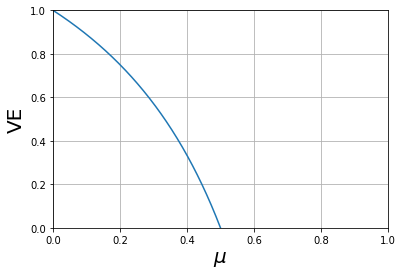

In [3]:
# The relationship between mu and VE is monotonic.
# So a credible interval in mu corresponds trivially
# to a credible interval in VE
mu = np.linspace(0.,0.999,500)
ax = plt.subplot(111)
ax.plot(mu, VE_fun(mu))
ax.grid()
ax.set_xlim([0, 1.])
ax.set_ylim([0, 1.])
ax.set_xlabel('$\mu$', size=20)
_ = ax.set_ylabel('VE', size=20)

In [4]:
# The number of patients with covid
N = 94

In [5]:
# We will try three priors on mu
# The pfizer, a flat prior, the Jeffrey's prior
aPrior = (0.700102, 1, 0.5)
bPrior = (1, 1, 0.5)
names  = ("Pfizer Prior", "Flat Prior", 'Jeffreys Prior')
color  = ('red', 'green', 'blue')

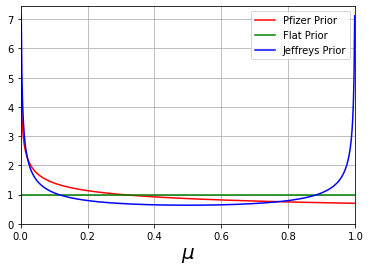

In [6]:
x  = np.linspace(0., 1., 500)
ax = plt.subplot(111)
for a,b,n,c in zip(aPrior, bPrior, names, color):
    rv = beta(a,b) 
    ax.plot(x, rv.pdf(x), color=c, label=n)
ax.grid()
ax.legend()
ax.set_xlim([0, 1.])
ax.set_xlabel('$\mu$', size=20)
_ = ax.set_ylim(bottom=0)


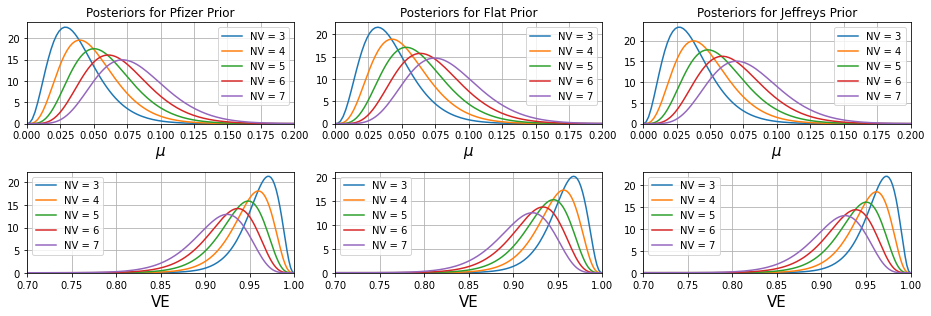

In [7]:
# posteriors on mu and VE for different number of vaccinated cases
NV  = [3,4,5,6,7]
x   = np.linspace(0., 0.9999, 500)
figure = plt.figure(figsize=(13, 4.5))
for a,b,n,ipl in zip(aPrior,bPrior,names,[1,2,3]):
    ax  = plt.subplot(2,3,ipl)
    ax2 = plt.subplot(2,3,ipl+3)
    for nVcovid in NV:
        rv = beta(a+nVcovid, b+N-nVcovid)
        ax.plot(x, rv.pdf(x), label="NV = "+str(nVcovid))
        ax2.plot(x, rv.pdf(mu_fun(x))*jac_fun(x), label="NV = "+str(nVcovid))
    
    ax.grid()
    ax.legend()
    ax.set_xlim([0, 0.2])
    ax.set_xlabel('$\mu$', size=15)
    ax.set_title("Posteriors for " + n)
    ax.set_ylim(bottom=0)
    ax2.grid()
    ax2.legend()
    ax2.set_xlim([0.7, 1.])
    ax2.set_xlabel('VE', size=15)
    ax2.set_ylim(bottom=0)

plt.tight_layout(w_pad=1)
plt.show()

In [18]:
# Now calculate the 95% CL on VE as a function of NV
for a,b,n in zip(aPrior,bPrior,names):
    for nVcovid in NV:
        rv = beta(a+nVcovid, b+N-nVcovid)
        mu95 = rv.ppf(0.95)
        print(n, "NV=",nVcovid, " VE > ",round(VE_fun(mu95),2), " at 95% CL")
    print(' ')

Pfizer Prior NV= 3  VE >  0.92  at 95% CL
Pfizer Prior NV= 4  VE >  0.9  at 95% CL
Pfizer Prior NV= 5  VE >  0.88  at 95% CL
Pfizer Prior NV= 6  VE >  0.87  at 95% CL
Pfizer Prior NV= 7  VE >  0.85  at 95% CL
 
Flat Prior NV= 3  VE >  0.91  at 95% CL
Flat Prior NV= 4  VE >  0.9  at 95% CL
Flat Prior NV= 5  VE >  0.88  at 95% CL
Flat Prior NV= 6  VE >  0.86  at 95% CL
Flat Prior NV= 7  VE >  0.85  at 95% CL
 
Jeffreys Prior NV= 3  VE >  0.92  at 95% CL
Jeffreys Prior NV= 4  VE >  0.9  at 95% CL
Jeffreys Prior NV= 5  VE >  0.89  at 95% CL
Jeffreys Prior NV= 6  VE >  0.87  at 95% CL
Jeffreys Prior NV= 7  VE >  0.85  at 95% CL
 


In [49]:
# Now the frequentist.
# Brute force.  There must be a better way.
# But CPU is cheap...
for nVCovid in NV:
    thisMu= 0.002
    dMu   = 0.001
    while binom.cdf(nVCovid, N, thisMu) > 0.05:
        thisMu = thisMu+dMu
    thisMu = thisMu - 0.5*dMu   # halfway back to previous
    print("Frequentist NV=",nVCovid, " VE > ",round(VE_fun(thisMu),2), " at 95% CL")

Frequentist NV= 3  VE >  0.91  at 95% CL
Frequentist NV= 4  VE >  0.9  at 95% CL
Frequentist NV= 5  VE >  0.88  at 95% CL
Frequentist NV= 6  VE >  0.86  at 95% CL
Frequentist NV= 7  VE >  0.84  at 95% CL
